# Customer Lifetime Value Prediction Overview

## Introduction
This analysis aims to predict customer lifetime value using the provided dataset from Kaggle. The dataset contains information about customers, their characteristics, and relevant features for predicting their lifetime value## Dataset Overview
- **Number of Rows:** 9134
- **Columns:**
    - Customer
    - State
    - Customer Lifetime Value
    - Response
    - Coverage
    - Education
    - Effective To Date
    - EmploymentStatus
    - Gender
    - Income
    - Location Code
    - Marital Status
    - Monthly Premium Auto
    - Months Since Last Claim
    - Months Since Policy Inception
    - Number of Open Complaints
    - Number of Policies
    - Policy Type
    - Policy
    - Renew Offer Type
    - Sales Channel
    - Total Claim Amount
    - Vehiclelass
    - Vehicle Size
   - ...
neering, and building a predictive model.


## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression 
from scipy import stats
from scipy.stats import norm,skew
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r"C:\Users\vicky\desktop\sample_project_1\data\Marketing-Customer-Value-Analysis.csv")
dataset

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
dataset.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
dataset.dtypes.value_counts()

object     16
int64       6
float64     2
dtype: int64

In [5]:
df1 = dataset.copy(deep = True)
df1['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

## Data Visvalization

mu = 8004.94 and sigma = 6870.59


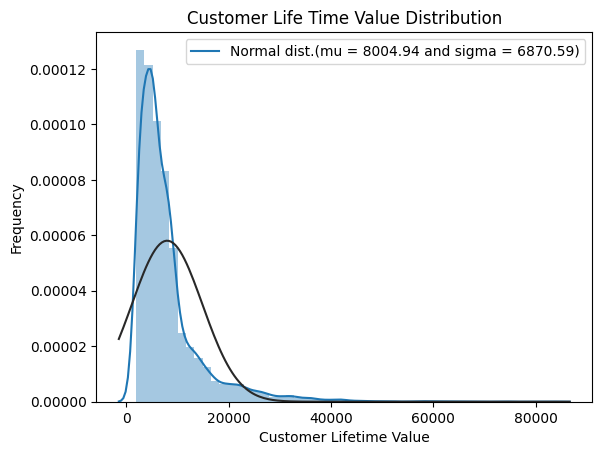

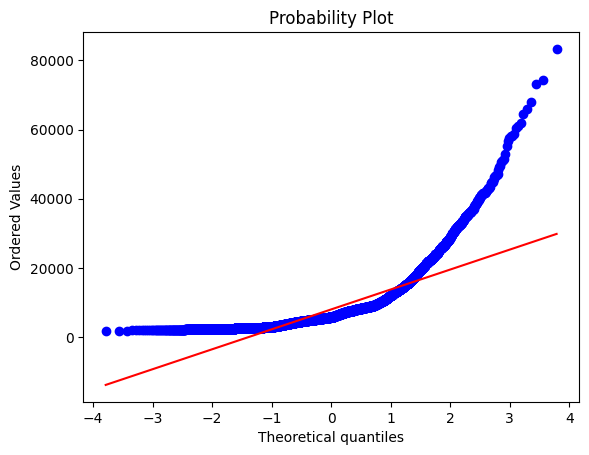

In [6]:
sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

mu = 8.75 and sigma = 0.65


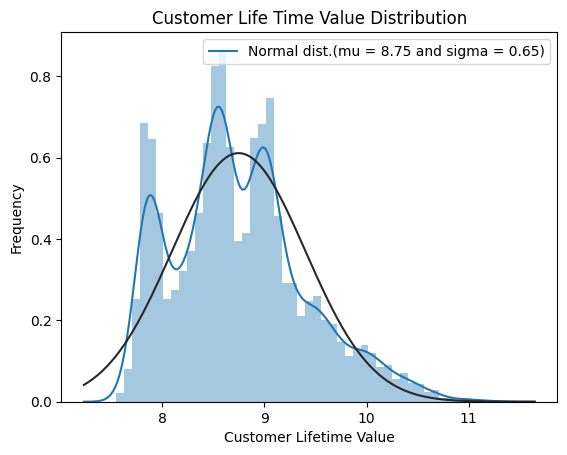

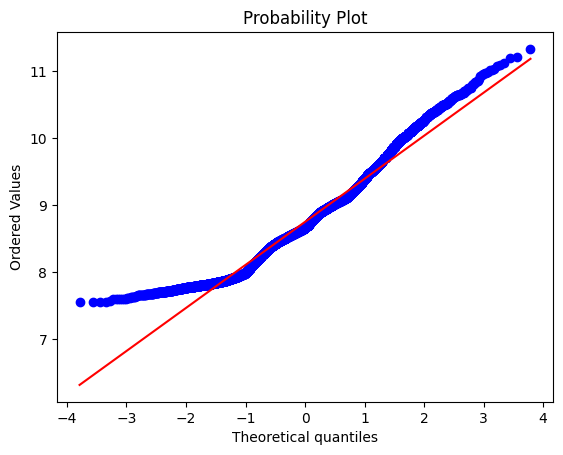

In [7]:
df1['Customer Lifetime Value'] = np.log1p(df1['Customer Lifetime Value'])
sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

In [8]:
df_num = dataset.select_dtypes(include=['int64','float'])
df_num.columns

df_num_corr = df_num.corr()['Customer Lifetime Value'].sort_values(ascending=False)
df_num_corr

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

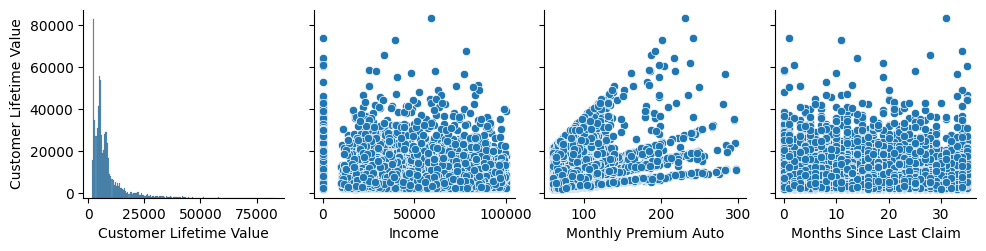

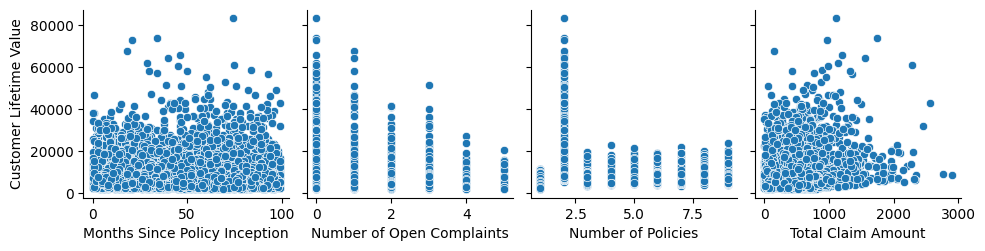

In [9]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['Customer Lifetime Value'])

In [10]:
df_obj = dataset.select_dtypes(include=['object'])
object_columns = df_obj.columns

In [11]:
dataset1 = dataset.copy()
label_encoder = LabelEncoder()
for column in object_columns:
    dataset1[column] = label_encoder.fit_transform(dataset1[column])
    
dataset1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,4,2763.519279,0,0,0,47,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1
1,5946,0,6979.535903,0,1,0,24,4,0,0,...,42,0,8,1,5,2,0,1131.464935,0,1
2,96,2,12887.431650,0,2,0,41,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
3,8016,1,7645.861827,0,0,0,12,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
4,2488,4,2813.692575,0,0,0,52,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1


In [12]:
dataset1.dtypes.value_counts()

int32      16
int64       6
float64     2
dtype: int64

In [13]:
dataset1.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Split the data for `Training` and `Testing`

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset1.drop("Customer Lifetime Value", axis=1), 
                                                    dataset1['Customer Lifetime Value'],
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(7307, 7307, 1827, 1827)

### Normalize the data using `StandardScaler`

In [17]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(x_train_scaled)
X_test = pd.DataFrame(x_test_scaled)

## Model Building
**RandomForestRegressor**

In [18]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_test, y_test))
y_pred = rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

0.6926808007818144
Mean Absolute Error: 1505.6221912903284


**LinearRegression**

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

0.1552080746313408
Mean Absolute Error: 3986.4572639990706


**LinearRegression**

In [21]:
xgbr = XGBRegressor(n_estimators=10, random_state=42)
xgbr.fit(X_train, y_train)
print("R-squared score:", xgbr.score(X_test, y_test))
y_pred = xgbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

R-squared score: 0.6757159521133658
Mean Absolute Error: 1609.7310218092332


Find the best parameter using `GridSearchCV`

In [22]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    # Add more hyperparameters to tune
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R-squared score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R-squared score: 0.6824540254772451


## Conclusion

In this analysis, we performed hyperparameter tuning for an XGBoost Regressor using Grid Search. The following hyperparameters were explored:

- **Learning Rate:** [0.01, 0.1, 0.2]
- **Number of Estimators:** [100, 200, 300]
- **Maximum Depth:** [3, 5, 7]

After conducting a Grid Search with cross-validation (cv=3) and using the R-squared score as the evaluation metric, the best combination of hyperparameters was found to be:

- Learning Rate: 0.1
- Number of Estimators: 100
- Maximum Depth: 3

This configuration resulted in the highest R-squared score of approximately 0.6825 on the training data. These hyperparameters can be used to train the final XGBoost Regressor model for accurate predictions on new data.

The next steps in the analysis could involve evaluating the model's performance on a validation or test set, interpreting feature importance, and potentially refining the model further based on specific business requirements or considerations.
